  # **Assignment**

# TO - DO - Task

# Task 1. Classify Study Time:

In [ ]:
# Daily time (in hours): [study, entertainment, sleep]
time_data = [
(3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
(4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
(5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
(3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
(4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

Create empty lists for study time classifications:

In [ ]:
Low = []
Moderate = []
High = []

In [ ]:
for study in time_data:
  if study[0]< 3.0:
    Low.append(study[0])
  elif study[0] <= 5.0:
    Moderate.append(study[0])
  else:
    High.append(study[0])

In [ ]:
#low
print(Low)
#moderate
print(Moderate)
#high
print(High)

[2.5, 1.5, 2.0, 2.5]
[3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
[5.5, 6.0]


# Task 2. Based on Data

In [ ]:
print(f"Days of Low study time = {len(Low)}")
print(f"Days of Moderate study time = {len(Moderate)}")
print(f"Days of High study time = {len(High)}")

Days of Low study time = 4
Days of Moderate study time = 9
Days of High study time = 2


# Task 3. Convert Study Hours to Minutes:

In [ ]:
study_minutes = []
for study in time_data:
  study_minutes.append(study[0] * 60)
print(study_minutes)

[210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


# Task 4. Analyze Average Time Use:

In [ ]:
study_hours = []
entertainment_hours = []
sleep_hours = []

In [ ]:
for data in time_data:
  study_hours.append(data[0])
  entertainment_hours.append(data[1])
  sleep_hours.append(data[2])

In [ ]:
print(f"Average time spent studying = {sum(study_hours)/len(study_hours):.2f}")
print(f"Average time spent on entertainment = {sum(entertainment_hours)/len(entertainment_hours):.2f}")
print(f"Average time spent sleeping = {sum(sleep_hours)/len(sleep_hours):.2f}")

Average time spent studying = 3.70
Average time spent on entertainment = 2.50
Average time spent sleeping = 7.17


# Task 5. Visualization - Study vs Sleep Pattern:

In [ ]:
import matplotlib.pyplot as plt

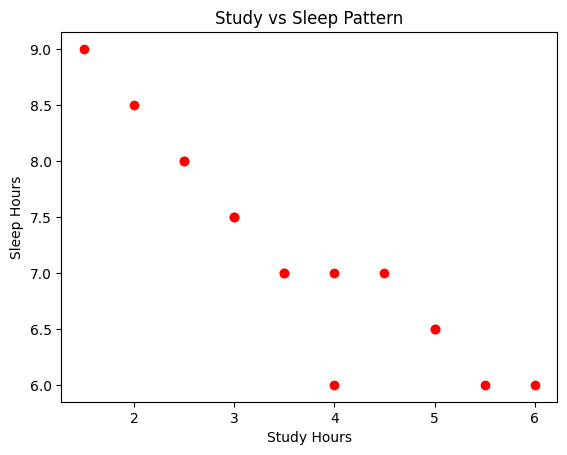

In [ ]:
plt.scatter(study_hours, sleep_hours, color="red")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")
plt.show()

# 8.1.1 Exercise - **Recursion**:

# Task 1 - Sum of Nested Lists:

In [ ]:
def sum_nested_list(nested_list):
  total = 0
  for element in nested_list:
    if isinstance(element, list):
      total += sum_nested_list(element)
    else:
      total += element
  return total

In [ ]:
nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
sum_nested_list(nested_list)

36

# Task 2 - Generate All Permutations of a String:

In [ ]:
def generate_permutations(s):
  if len(s) <= 1:
    return [s]

  permutations = set()
  for i, char in enumerate(s):
    remaining = s[:i] + s[i+1:]
    for perm in generate_permutations(remaining):
      permutations.add(char + perm)
  return list(sorted(permutations))

In [ ]:
print(generate_permutations("abc"))
print(generate_permutations("aab"))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


# Task 3 - Directory Size Calculation:

In [ ]:
directory_structure = {
  "file1.txt": 200,
  "file2.txt": 300,
  "subdir1": {
    "file3.txt": 400,
    "file4.txt": 100
  },
  "subdir2": {
    "subsubdir1": {
      "file5.txt": 250
  },
    "file6.txt": 150
  }
}

In [ ]:
def calculate_directory_size(directory):
  total = 0
  for key, value in directory.items():
    if isinstance(value, int):
      total += value
    else:
      total += calculate_directory_size(value)
  return total

In [ ]:
calculate_directory_size(directory_structure)

1400

# 8.2.1 Exercises - Dynamic Programming:**bold text**

# Task 1 - Coin Change Problem:

In [15]:
def min_coins(coins, amount):
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0

    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1

In [22]:
#test
coins = [1, 2, 5]
amount = 11
min_coins(coins, amount)

3

In [20]:
coins = [5, 5 ,1]
amount = 11
min_coins(coins, amount)

3

# Task 2 - Longest Common Subsequence (LCS):

In [11]:
def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)

    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i-1] == s2[j-1]:
                dp[i][j] = 1 + dp[i-1][j-1]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[m][n]

In [12]:
s1 = "abcde"
s2 = "ace"

print(longest_common_subsequence(s1, s2))

3


# Task 3 - 0/1 Knapsack Problem:

In [17]:
def knapsack(weights, values, capacity):
    n = len(weights)

    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]

    return dp[n][capacity]

In [18]:
weights = [1, 3, 4, 5]
values  = [1, 4, 5, 7]
capacity = 7

print(knapsack(weights, values, capacity))

9
